# Prova - Dinâmica de Sistemas Robóticos

Este arquivo apresenta como finalidade aplicar todos os conhecimentos da disciplina de Dinâmica de Sistemas Robóticos, ministrada pelo professor Dr. Marcelo Becker, no curso de Engenharia Mecatrônica na USP-EESC. Nele conterá uma classe responsável por executar todos os métodos ensinados em aula, de maneira a gerar as respostas das questões da prova.

Os códigos estarão disponíveis no meu repositório do GitHub: https://github.com/faresedu/Dynamics-Robotics-Systems
Para coloca-los em sua máquina, caso deseja, basta executar o comando git clone: <endereço pego no proprio repositório>

In [1]:
pip install roboticstoolbox-python

Note: you may need to restart the kernel to use updated packages.


In [2]:
import numpy as np
from robotClass import myRobot
import sympy as sym


# Deslocamento do link
d = [0, 0]

# Comprimento do link
a = [50, 60]

# Torção do link
alpha = [0, 0]

# Limites de movimento das juntas
limits = [np.deg2rad([0, 30]), np.deg2rad([180, 120])]

# Objeto da classe myRobot
robot = myRobot(name='Manipulator RR', joints=2, typeJoints='RR', d = d, a=a, alpha=alpha, qlim=limits)

# Questão A
Monte um esquemático das juntas e elos do robô manipulador. Complete o desenho com os sistemas de coordenadas no esquemático do robô de acordo com a notação de Denavit-Hartenberg. Mostre no seu desenho a localização de cada origem dos sistemas de coordenadas e dos eixos xi, yi e
zi.


<img src="images/desenho.jpg" alt="drawing" width="1000"/>


# Questão B
Baseado nos eixos obtidos no item anterior e dos dados de seu robô manipulador, obtenha os parâmetros ai, di, θi e αi envolvidos na notação de Denavit-Hartenberg do robô


In [3]:
robot.matrixDH()
print(robot.transforms["DH"])

DHRobot: end effector, 2 joints (RR), dynamics, standard DH parameters
┌────┬────┬────┬──────┬────────┬────────┐
│θⱼ  │ dⱼ │ aⱼ │  ⍺ⱼ  │   q⁻   │   q⁺   │
├────┼────┼────┼──────┼────────┼────────┤
│ q1 │  0 │ 50 │ 0.0° │   0.0° │  30.0° │
│ q2 │  0 │ 60 │ 0.0° │ 180.0° │ 120.0° │
└────┴────┴────┴──────┴────────┴────────┘

┌─┬──┐
└─┴──┘



# Questão C
Obtenha as matrizes 4x4 i−1Ai descrevendo a posição e orientação relativas entre os elos i−1 e i. 

In [4]:
theta1, theta2 = sym.symbols('θ1 θ2')

robot.fkine([theta1, theta2], False)

print('Matriz A01')
print(robot.fkineD['T_01'])

print('Matriz A12')
print(robot.fkineD['T_12'])

print('DH')
print(robot.fkineD['DH'])

Matriz A01
  cos(θ1)      -1.0*sin(θ1) 0            50*cos(θ1)    
  sin(θ1)      1.0*cos(θ1)  0            50*sin(θ1)    
   0         0         1         0         
   0         0         0         1         

Matriz A12
  cos(θ2)      -1.0*sin(θ2) 0            60*cos(θ2)    
  sin(θ2)      1.0*cos(θ2)  0            60*sin(θ2)    
   0         0         1         0         
   0         0         0         1         

DH
  -1.0*sin(θ1)*sin(θ2) + cos(θ1)*cos(θ2) -1.0*sin(θ1)*cos(θ2) - 1.0*sin(θ2)*cos(θ1) 0            -60.0*sin(θ1)*sin(θ2) + 60*cos(θ1)*cos(θ2) + 50*cos(θ1)  
  sin(θ1)*cos(θ2) + 1.0*sin(θ2)*cos(θ1) -1.0*sin(θ1)*sin(θ2) + 1.0*cos(θ1)*cos(θ2) 0            60*sin(θ1)*cos(θ2) + 50*sin(θ1) + 60.0*sin(θ2)*cos(θ1)  
  0            0            1.00000000000000 0             
  0            0            0            1             



# Questão D
Obtenha as expressões da cinemática direta do robô manipulador. 
Supondo que façamos a cinemática direta para os ângulos θ1 = 30° e θ2 = 90°

In [5]:
robot.fkine(np.deg2rad([30, 120]))

print('Matriz A01')
print(robot.fkineD['T_01'], '\n\n')


print('Matriz A12')
print(robot.fkineD['T_12'], '\n\n')

print('DH')
print(robot.fkineD['DH'])

Matriz A01
[[ 0.86603 -0.5      0.      43.30127]
 [ 0.5      0.86603 -0.      25.     ]
 [ 0.       0.       1.       0.     ]
 [ 0.       0.       0.       1.     ]] 


Matriz A12
[[ -0.5      -0.86603   0.      -30.     ]
 [  0.86603  -0.5       0.       51.96152]
 [  0.        0.        1.        0.     ]
 [  0.        0.        0.        1.     ]] 


DH
[[-0.86603 -0.5      0.      -8.66025]
 [ 0.5     -0.86603  0.      55.     ]
 [ 0.       0.       1.       0.     ]
 [ 0.       0.       0.       1.     ]]


# Questão E
Obtenha as expressões da cinemática inversa do robô manipulador. Para fins práticos o grupo decidiu utilizar um método iterativo implementado e amplamente utilizado pela biblioteca do Peter Corke.

Ref: https://github.com/petercorke/robotics-toolbox-python

<br>

<a id='lm'></a>

### Levenberg-Marquardt (LM) Method
Pode-se melhorar ainda mais a resolvabilidade através do Método de Levenberg-Marquardt (LM).

\begin{align*}
    \bf{q}_{k+1} 
    &= 
    \bf{q}_k +
    \left(
        \bf{A}_k
    \right)^{-1}
    \bf{g}_k \\
    %
    \bf{A}_k
    &=
    {\bf{J}(\bf{q}_k)}^\top
    \bf{W}_e \
    {\bf{J}(\bf{q}_k)}
    +
    \bf{W}_n
\end{align*}

where $\bf{W}_n = \text{diag}(\bf{w_n})(\bf{w_n} \in \mathbb{R}^n_{>0})$ é um vetor de pesos positivos. Essa matriz de amortecimento é introduzida para garantir que a matriz $\bf{A}_k$ eja não singular (não singular) e positiva definida. A performace do método LM 
The performance of the LM method depende grandemente da escolha de $\bf{W}_n$. 

Um método que fornece funcionalidade para realizar cinemática inversa numérica (IK) usando o método de Levenberg-Marquardt. Este é um solucionador rápido implementado em C++. Ref: https://github.com/petercorke/robotics-toolbox-python#3




Parameters

Tep

    The desired end-effector pose

end

    the link considered as the end-effector

start

    the link considered as the base frame, defaults to the robots's base frame

q0

    The initial joint coordinate vector

ilimit

    How many iterations are allowed within a search before a new search is started

slimit
 
    How many searches are allowed before being deemed unsuccessful

tol

    Maximum allowed residual error E

mask

    A 6 vector which assigns weights to Cartesian degrees-of-freedom error priority
    
joint_limits
    Reject solutions with joint limit violations seed A seed for the private RNG used to generate random joint coordinate vectors

k
    
    Sets the gain value for the damping matrix Wn in the next iteration. See synopsis
    
method

    One of "chan", "sugihara" or "wampler". Defines which method is used to calculate the damping matrix Wn in the ``step`` method

In [6]:
robot.fkine(np.deg2rad([30, 120]), False)
T = robot.fkineD['DH']
q_out, success = robot.ikine(T=T, firstPose=np.deg2rad([0,180]), q=np.deg2rad([30,120]), unit='rad')

np.rad2deg(q_out)


Inverse Kinematics converged successfully! [ 30. 120.]


array([ 30.00000207, 120.00000304])

# Questão F
Usando o software Python, com a biblioteca do Peter Corke, confirme os resultados obtidos analiticamente nos itens anteriores. Teste algumas possibilidade de ângulos de juntas e posições do efetuador final e gere um relatório.

O gif não está funcionando nesse ambiente, para isso, basta olhar na pasta de imagens destinada aos gifs.

Matriz A01
[[ 0.98481 -0.17365  0.      49.24039]
 [ 0.17365  0.98481 -0.       8.68241]
 [ 0.       0.       1.       0.     ]
 [ 0.       0.       0.       1.     ]] 


Matriz A12
[[ -0.17365  -0.98481   0.      -10.41889]
 [  0.98481  -0.17365   0.       59.08847]
 [  0.        0.        1.        0.     ]
 [  0.        0.        0.        1.     ]] 


DH
[[-0.34202 -0.93969  0.      28.71918]
 [ 0.93969 -0.34202  0.      65.06397]
 [ 0.       0.       1.       0.     ]
 [ 0.       0.       0.       1.     ]]


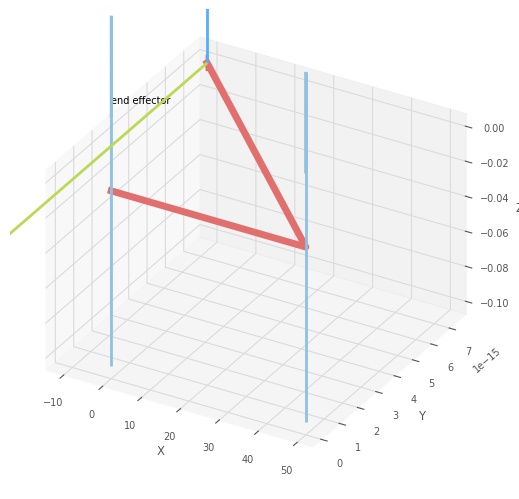

<Figure size 640x480 with 0 Axes>

In [7]:
robot.fkine(np.deg2rad([10, 100]))

print('Matriz A01')
print(robot.fkineD['T_01'], '\n\n')


print('Matriz A12')
print(robot.fkineD['T_12'], '\n\n')

print('DH')
print(robot.fkineD['DH'])

robot.plotRobot(q=np.deg2rad([10, 100]), firstPose=np.deg2rad([0, 180]), movie='images/gif_angle_10_100.gif')

Matriz A01
[[ 0.93969 -0.34202  0.      46.98463]
 [ 0.34202  0.93969 -0.      17.10101]
 [ 0.       0.       1.       0.     ]
 [ 0.       0.       0.       1.     ]] 


Matriz A12
[[ -0.34202  -0.93969   0.      -20.52121]
 [  0.93969  -0.34202   0.       56.38156]
 [  0.        0.        1.        0.     ]
 [  0.        0.        0.        1.     ]] 


DH
[[-0.64279 -0.76604  0.       8.41737]
 [ 0.76604 -0.64279  0.      63.06367]
 [ 0.       0.       1.       0.     ]
 [ 0.       0.       0.       1.     ]]


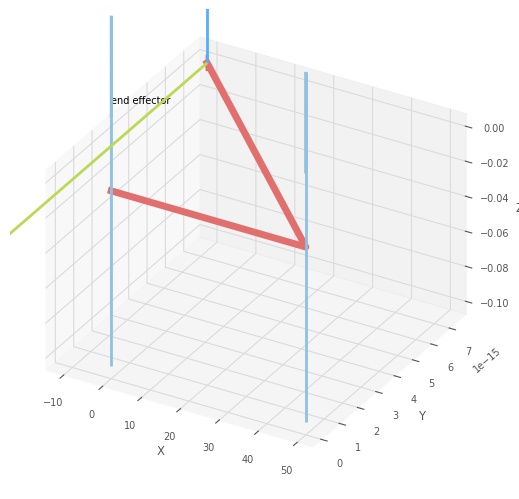

<Figure size 640x480 with 0 Axes>

In [8]:
robot.fkine(np.deg2rad([20, 110]))

print('Matriz A01')
print(robot.fkineD['T_01'], '\n\n')


print('Matriz A12')
print(robot.fkineD['T_12'], '\n\n')

print('DH')
print(robot.fkineD['DH'])

robot.plotRobot(q=np.deg2rad([20, 110]), firstPose=np.deg2rad([0, 180]), movie='images/gif_angle_20_110.gif')

# Questão G
Para os comprimentos de elos utilizados no projeto, obtenha o jacobiano geométrico do robô J(q). Para isso, usamos a função da classe jacobian

In [9]:
J = robot.jacobian(np.array([0, 0, 1]), np.deg2rad([30, 120]))

print('Jacobian Final\n', J, '\n\n')




Jacobian Final
 [[-55.       -3.03848]
 [ -8.66025  21.33975]
 [  0.        0.     ]
 [  0.        0.     ]
 [  0.        0.     ]
 [  1.        1.     ]] 




# Questão H
Obtenha as equações de movimento do robô manipulador usando o método de Euler-Lagrange. 

In [10]:
import numpy as np
import sympy as sym

# Variaveis simbolicas
theta1, theta2 = sym.symbols('θ1 θ2') # Angulos das juntas
dtheta1, dtheta2 = sym.symbols('dθ1 dθ2') # Velocidade angulares das juntas
x_ef, y_ef = sym.symbols('x_ef y_ef') # Posicao do efetuador
x_c1, y_c1 = sym.symbols('x_c1 y_c1') # Posicao do centro da primeira junta
x_c2, y_c2 = sym.symbols('x_c2 y_c2') # Posicao do centro da segunda junta
l_c1, l_c2 = sym.symbols('l_c1 l_c2') # Comprimento dos links
l1, l2 = sym.symbols('l1 l2') # Comprimento dos links
m1, m2 = sym.symbols('m1 m2') # Massa dos links
I1, I2 = sym.symbols('I_1 I_2') # Momento de inercia dos links
# v1, v2 = sym.symbols('v1 v2') # Velocidade das juntas

J = robot.jacobian(np.array([0, 0, 1]), np.deg2rad([30, 120]))

J_l1 = np.array([[-l_c1*sym.sin(theta1), 0], [l_c1*sym.cos(theta1), 0]])
v1 = np.array([[-l_c1*sym.sin(theta1)*dtheta1, 0], [l_c1*sym.cos(theta1)*dtheta1, 0]])
omega1 = dtheta1

print('Jacobian L1\n', J_l1, '\n\n')
print('Velocidade L1\n', v1, '\n\n')

J_l2 = np.array([[-l_c1*sym.sin(theta1)-l_c2*sym.sin(theta1+theta2), -l_c2*sym.sin(theta1+theta2)], [l_c1*sym.cos(theta1)+l_c2*sym.cos(theta1+theta2), l_c2*sym.cos(theta1+theta2)]])
v2 = np.array([[-l_c1*sym.sin(theta1)*dtheta1-l_c2*sym.sin(theta1+theta2)*(dtheta1+dtheta2), -l_c2*sym.sin(theta1+theta2)*(dtheta1+dtheta2)], [l_c1*sym.cos(theta1)*dtheta1+l_c2*sym.cos(theta1+theta2)*(dtheta1+dtheta2), l_c2*sym.cos(theta1+theta2)*(dtheta1+dtheta2)]])
omega2 = dtheta1+dtheta2

print('Jacobian L2\n', J_l2, '\n\n')
print('Velocidade L2\n', v2, '\n\n')


Jacobian L1
 [[-l_c1*sin(θ1) 0]
 [l_c1*cos(θ1) 0]] 


Velocidade L1
 [[-dθ1*l_c1*sin(θ1) 0]
 [dθ1*l_c1*cos(θ1) 0]] 


Jacobian L2
 [[-l_c1*sin(θ1) - l_c2*sin(θ1 + θ2) -l_c2*sin(θ1 + θ2)]
 [l_c1*cos(θ1) + l_c2*cos(θ1 + θ2) l_c2*cos(θ1 + θ2)]] 


Velocidade L2
 [[-dθ1*l_c1*sin(θ1) - l_c2*(dθ1 + dθ2)*sin(θ1 + θ2)
  -l_c2*(dθ1 + dθ2)*sin(θ1 + θ2)]
 [dθ1*l_c1*cos(θ1) + l_c2*(dθ1 + dθ2)*cos(θ1 + θ2)
  l_c2*(dθ1 + dθ2)*cos(θ1 + θ2)]] 




Matriz de inércia

<img src="images/matriz_inercia.png" alt="drawing" width="1000"/>
<img src="images/lagrange1.jpg" alt="drawing" width="1000"/>
<img src="images/lagrange2.jpg" alt="drawing" width="1000"/>
<img src="images/lagrange3.jpg" alt="drawing" width="1000"/>
<img src="images/lagrange4.jpg" alt="drawing" width="1000"/>





# Questão I
Obtenha as equações de movimento do robô manipulador usando o método de Kane. 


<img src="images/kane1.jpeg" alt="drawing" width="1000"/>
<img src="images/kane2.jpeg" alt="drawing" width="500"/>


# Questão J
O seu robô manipulador possui singularidades? Justifique e dê exemplos de posições singulares, caso elas existam. Como seria possível evitar esse tipo de problema?

In [11]:
theta1 = 0
theta2 = 180

# jacob
sing = [] 

while True:
    if theta1 >= 360:
        if len(sing) == 0:
            print('Sem singularidade')
            print('theta1: ', theta1, 'theta2: ', theta2)
        break

    try:
        jacob = robot.jacobian(np.array([0, 0, 1]), np.deg2rad([theta1, theta2]))
        if np.linalg.det(jacob[:2,:2]) == 0:
            sing.append([theta1, theta2])
         
        

    except: 
        print('Erro na jacobiana')
        print('theta1: ', theta1, 'theta2: ', theta2)
        break

    theta1 += 1
    theta2 -= 1
if len(sing) > 0:
    print('Singularidades')
    print(sing)


Singularidades
[[0, 180], [180, 0]]


Qualquer manipulador robotico possui singularidades, portanto, basta descobrir os valores de theta1 e theta 2 para os quais o determinante do Jacobiano resulta em zero. Nesses pontos as velocidades conjuntas não podem ser especificadas caracterizando uma singularidade, no nosso caso foi mostrado acima alguns valores para os quais o determinante do Jacobiano é zero.
Para o nosso manipulador robotico não será necessario medidas para escapar dessas singularidades visto que o manipulador não alcançara tais valores para theta1 e theta2

# Questão K
Descreva como é possível gerar trajetórias que minimizarão problemas de vibração em seu manipulador robótico.

$\large{\text{Resposta}}$

Planejamento de trajetória:
Uma trajetória suave é resultado de trechos parabólicos, trechos de aceleração constante, comportamento contínuo para a posição e velocidade e comportamento suave para a velocidade.

Filtragem de trajetória:
Filtros de Kalman ou de média móvel podem reduzir ruídos e oscilações.

Controle de trajetória avançado:
Controle de feedback robusto ou controle preditivo podem ajustar a trajetória em tempo real.

Otimização de trajetória:
Algoritmos de otimização podem encontram trajetórias que evitam acelerações bruscas.

Sintonização de parâmetros do controlador:
Ajustar os parâmetros do controlador PID.

Redução de ressonância:
Identificar as frequências naturais do sistema e evitar excitá-las, mudando a frequência de operação do sistema e mudando parâmetros dos controladores.

Materiais e design do manipulador:
Utilizar materiais que minimizem vibrações e a partir do design no robô evitar construções com rigidez excessiva que possam gerar vibrações.